In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

from matplotlib import pyplot as plt


Declaring and Manipulating Tensors

Here, we will declare a set of points and attempt to use tensorflow to fit a linear regression line to the points. This is a derivation of the [Simple Linear Regression with Tf 2.0](https://github.com/WooilJeong/TensorFlow/blob/master/01%20Simple%20Linear%20Regression.ipynb) code as written by W. Jeong.

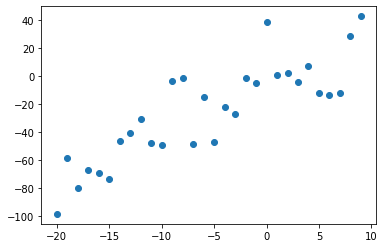

In [20]:
x = [-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
y = [-98.38, -58.49, -79.61, -67.03, -68.86, -73.48, -46.22, -40.71, -30.80, -47.46, -49.03, -3.76, -1.51, -48.29, -14.73, -46.90, -22.38, -27.38, -1.15, -4.85, 38.80, 0.84, 2.03, -4.26, 7.31, -12.31, -13.26, -11.74, 28.64, 42.75
]

fig, ax = plt.subplots()
ax.scatter(x, y)

The equation for a linear model is $y = wx + b$, where

* $y$ is the dependant variable (target)

* $x$ is the independant variable (predictor)

* $w$ is the weight vector

* $b$ is the bias vector

The process of fitting a line involves training of the parameters $w$ and $b$ based on the data we plotted above.

In [0]:
w = tf.Variable(0) # Initializing a zero weight vector
b = tf.Variable(0.1) # Initializing a low bias value
learning_rate = 0.001 # Defining a learning rate for Gradient Descent

err = []
for stp in range(0, 100):
  # Programming the gradient calculation and descent
  with tf.GradientTape() as grad_tape:
    y_hat = w * x + b
    error = tf.reduce_mean(tf.square())
  
  w_update, b_update = grad_tape.gradient(error, [w, b])
  w.assign_sub(learning_rate * w_update)
  b.assign_sub(learning_rate * b_update)

  err.append(error.numpy())



Tensorflow offers easy access to various commonly available datasets through the Tensorflow Datasets API. List of all Tensorflow Datasets can be seen by running the following code

```tfds.list_builders()```

_Please make sure that the Tensorflow Dataset package is installed via pip or conda._

Loading a Dataset

In [0]:
cifar10_train = tfds.load(name="cifar10", split="train")
cifar10_test = tfds.load(name="cifar10", split="test")

assert isinstance(cifar10_train, tf.data.Dataset)
print(cifar10_train)

For more details on using the Tensorflow Datasets class and related functions such as the declaration and usage of input pipelines and visualization, visit the following link:
https://www.tensorflow.org/datasets/overview